In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('../../Data/OptimizationData/ADAUSDT_7_5_wave_trend_optimizations.csv')

In [19]:
df.head()

,mean,std,skewness,kurtosis,entropy,ob_level,os_level,k,clean_gains,r2
0,0.094280,0.002346,0.055612,-0.985233,9.217999,51,-55,0.010,2.461501,0.882463
1,0.085529,0.005681,0.283234,-1.222078,9.216114,46,-55,0.006,6.704611,0.700541
2,0.098893,0.003691,-0.216986,-0.973035,9.217610,56,-50,0.009,3.713368,0.824753
3,0.095097,0.002326,0.409831,-0.210873,9.218010,46,-55,0.009,4.341009,0.932410
4,0.107289,0.002492,0.336971,-0.418512,9.218040,46,-55,0.001,6.673320,0.960356


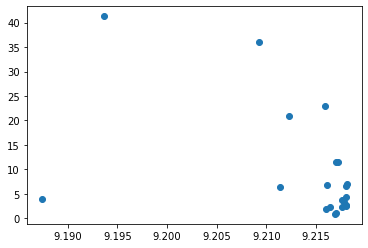

In [14]:
plt.scatter(df['entropy'], df['clean_gains'])

# There are 3 target variables, so 3 models are built

In [15]:
ob_level_df = df.drop(columns = ['mean', 'os_level', 'k', 'clean_gains', 'r2'])
os_level_df = df.drop(columns = ['mean', 'ob_level', 'k', 'clean_gains', 'r2'])
k_df = df.drop(columns = ['mean', 'os_level', 'ob_level', 'clean_gains', 'r2'])

# ob_level

In [43]:
X = ob_level_df[['std', 'skewness', 'kurtosis', 'entropy']].to_numpy()
y = ob_level_df['ob_level'].to_numpy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
ob_level_model = DecisionTreeRegressor()

ob_level_model.fit(X_train, y_train)

y_pred = ob_level_model.predict(X_test)

ob_level_r2 = metrics.r2_score(y_test, y_pred)

In [46]:
ob_level_r2

-1.784552845528455

# os_level

In [47]:
X = os_level_df[['std', 'skewness', 'kurtosis', 'entropy']].to_numpy()
y = os_level_df['os_level'].to_numpy()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
os_level_model = DecisionTreeRegressor()

os_level_model.fit(X_train, y_train)

y_pred = os_level_model.predict(X_test)

os_level_r2 = metrics.r2_score(y_test, y_pred)

In [56]:
os_level_r2

-2.8

# k

In [61]:
X = k_df[['std', 'skewness', 'kurtosis', 'entropy']].to_numpy()
y = k_df['k'].to_numpy()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
k_model = DecisionTreeRegressor()

k_model.fit(X_train, y_train)

y_pred = k_model.predict(X_test)

k_r2 = metrics.r2_score(y_test, y_pred)

In [64]:
k_r2

-4.24